In [17]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/merged_data.csv')


In [6]:
df

,who,age,is_hispanic,race,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,...,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,Full Time,Yes,More than HS,Never married,female,0,...,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,Full Time,Yes,More than HS,Never married,female,0,...,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,Full Time,Yes,HS/GED,Married or Partnered,male,0,...,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,Part Time,Yes,More than HS,Never married,female,0,...,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Part Time,Yes,HS/GED,Never married,female,0,...,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,...,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NaN,NaN,NaN,NaN,male,0,...,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,Full Time,Yes,HS/GED,Never married,male,0,...,0,0,0,0,0,0,0.0,0.0,1.0,1
2391,3559,34.0,No,Other,Full Time,Yes,HS/GED,Never married,male,0,...,0,0,0,0,22,0,NaN,NaN,1.0,1


In [20]:
# Define the function for categorization
def categorize_race_eth(row):
    if row['race'] == 'White' and row['is_hispanic'] == 'No':
        return 'NHW'  # Non-Hispanic White
    elif row['race'] == 'Black' and row['is_hispanic'] == 'No':
        return 'NHB'  # Non-Hispanic Black
    elif row['is_hispanic'] == 'Yes':
        return 'Hisp'  # Hispanic
    else:
        return 'Other'

# Apply the function to each row to create the RaceEth column
df['RaceEth'] = df.apply(categorize_race_eth, axis=1)

# Find the index of the 'race' column
race_index = df.columns.get_loc('race') + 1  # +1 because we want to insert after the 'race' column

# Insert the new 'RaceEth' column right after the 'race' column
df.insert(loc=race_index, column='RaceEth', value=df.pop('RaceEth'))

# Display the DataFrame to verify the column order
df


,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

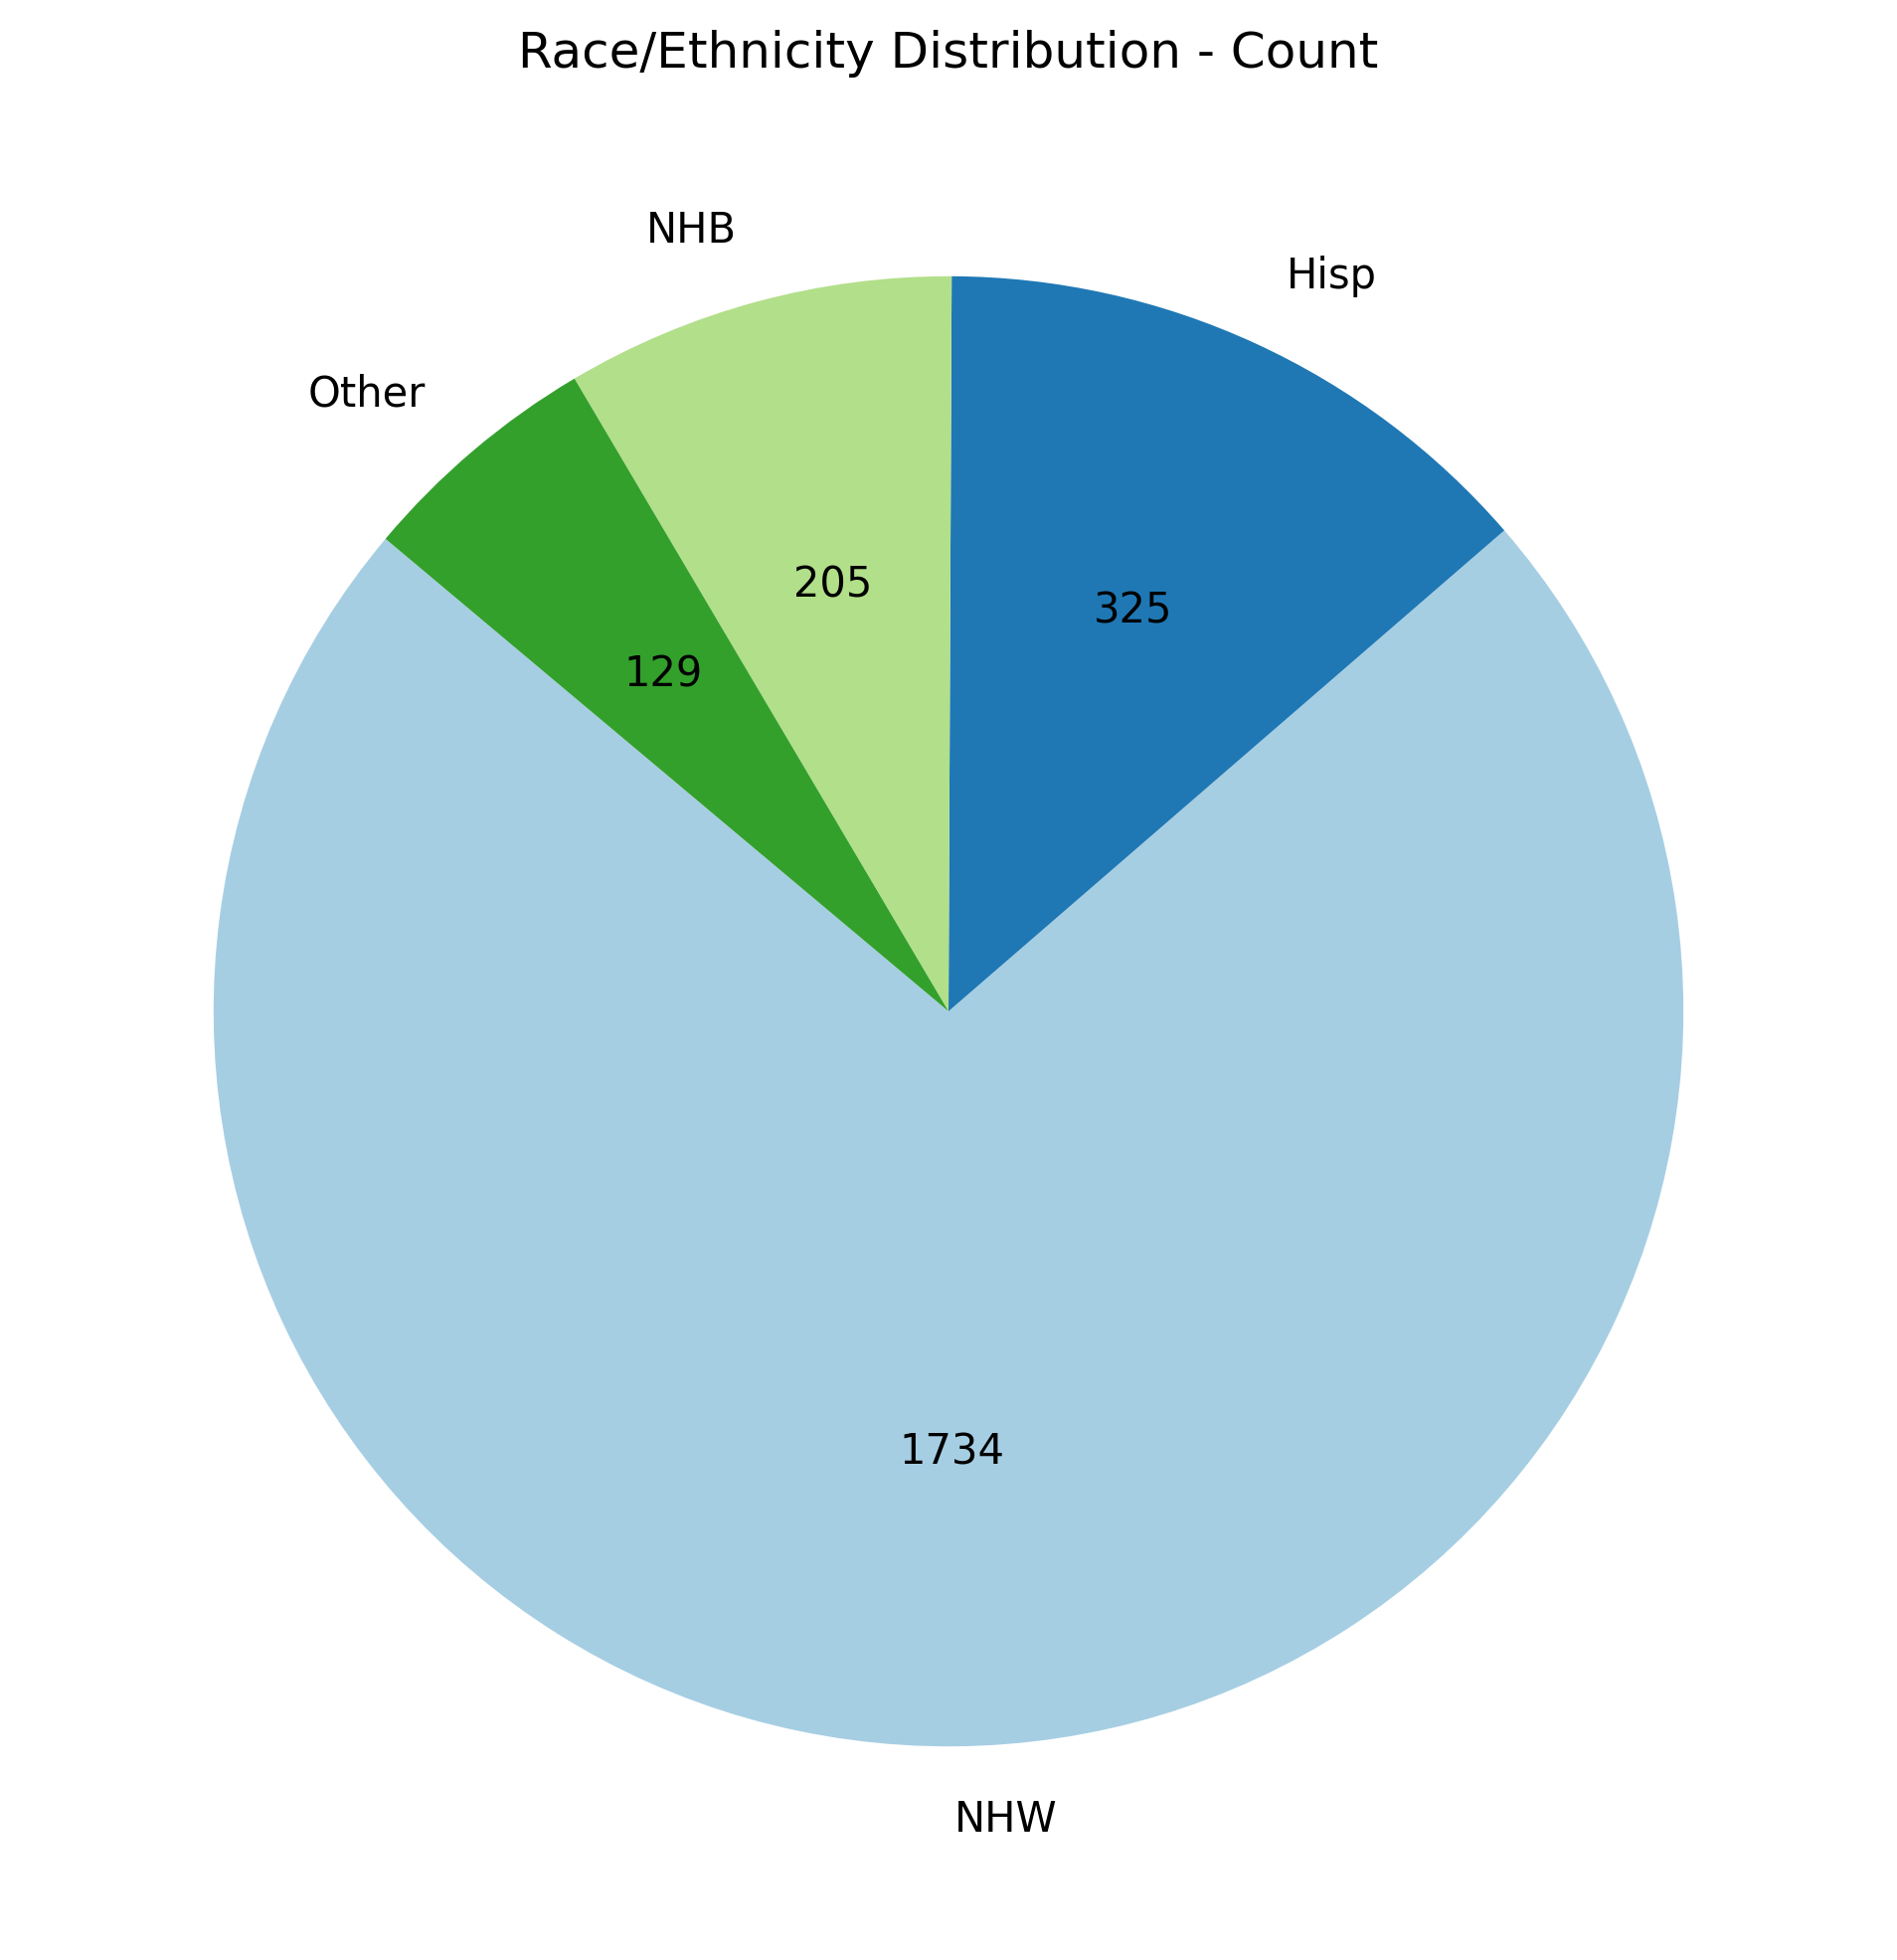

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count each category
race_counts = df['RaceEth'].value_counts()

# Function to format the pie slices as the absolute count instead of percentage
def absolute_value(val):
    a  = round(val/100.*race_counts.sum(), 0)
    return int(a)

# Create a pie chart
plt.figure(figsize=(8, 8), dpi=300)  # Set the figure size for better visibility
plt.pie(race_counts, labels=race_counts.index, autopct=absolute_value, startangle=140, colors=plt.cm.Paired(range(len(race_counts))))
plt.title('Race/Ethnicity Distribution - Count')

# Display the pie chart
plt.show()

In [22]:
# Save the DataFrame to a CSV file
df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv', index=False)

# Confirm the file has been saved
print("The DataFrame has been updated with the 'RaceEth' column and saved to 'updated_dataset_with_raceeth.csv'.")


The DataFrame has been updated with the 'RaceEth' column and saved to 'updated_dataset_with_raceeth.csv'.



# Apples to Apples
#Split into two functions
#1 that creates a list of k df with dimension N*2 (N is the sum of the little ns) 
#The df are going to have sample IDs and Race_eth(only two columns)
#first df in list will be half NHW and half minority participants (N=1000)
#Last df in list will have the first 500 rows of the first df, (all NHW samples)
#And the last 500 rows will have the 500 minority participants with 500 other NHW N= 1000
#Each dataset in the middle will have decreasing count of minority participants from 450 down to 50
#For every call we will be replacing 50 samples but the first 500 NHW stay the same, AND 
#The other minority participants will stay the same. 
#who, race-eth, sex, outcome
#2 Second function takes in the list of k dfs of subject id and race eth and uses that
#to merge out the rest of the data that we need for modeling. 

In [3]:
import pandas as pd
df = pd.read_csv("/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv")
pd.set_option('display.max_columns', None)


In [4]:
df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [5]:
from preprocess import DataPreprocessor  # Preprocessing utility for data preparation


In [6]:
# Initialize a preprocessor object for data transformation tasks
preprocessor = DataPreprocessor(df)
    
 
    # Specify columns to drop initially
columns_to_drop_1 = [
        'pain_when', 'is_smoker', 'per_day', 'max', 'amount', 'depression', 'anxiety',
        'schizophrenia', "max", "amount", "cocaine_inject_days", "speedball_inject_days",
        "opioid_inject_days", "speed_inject_days", "UDS_Alcohol_Count", 'UDS_Mdma/Hallucinogen_Count'
    ]
    
    # Try to drop the specified columns

preprocessor.drop_columns_and_return(columns_to_drop_1)
    
preprocessor.convert_yes_no_to_binary()
  
    # Specify columns for TLFB (Timeline Follow-Back) counts to process
specified_tlfb_columns = [
        'TLFB_Alcohol_Count', 'TLFB_Amphetamine_Count', 'TLFB_Cocaine_Count',
        'TLFB_Heroin_Count', 'TLFB_Benzodiazepine_Count', 'TLFB_Opioid_Count',
        'TLFB_THC_Count', 'TLFB_Methadone_Count', 'TLFB_Buprenorphine_Count'
    ]
    
   
preprocessor.process_tlfb_columns(specified_tlfb_columns)
 
preprocessor.calculate_behavioral_columns()
  
# preprocessor.move_column_to_end(selected_outcome)


# Specify columns to drop initially
columns_to_drop_2 = ['msm_npt', 'msm_frq', 'txx_prt']
    
  
preprocessor.drop_columns_and_return(columns_to_drop_2)
   
preprocessor.transform_data_with_nan_handling()
   
preprocessor.rename_columns()
   
    # Transform NaN (missing values) to zeros for binary columns
    
preprocessor.transform_nan_to_zero_for_binary_columns()
   
   
preprocessor.transform_and_rename_column('heroin_inject_days', 'rbsivheroin')
  
    # Fill missing values (NaN) with zeros for the 'ftnd' column

preprocessor.fill_nan_with_zero('ftnd')
    # Specify additional columns to drop
columns_to_drop_2 = [
        'rbs_iv_days', 'race', 'RBS_cocaine_Days', 'RBS_heroin_Days',
        'RBS_opioid_Days', 'RBS_speed_Days', 'RBS_speedball_Days'
    ]
    

preprocessor.drop_columns_and_return(columns_to_drop_2)
   
preprocessor.convert_uds_to_binary()
processed_data = preprocessor.dataframe



Dropping columns: ['pain_when', 'is_smoker', 'per_day', 'max', 'amount', 'depression', 'anxiety', 'schizophrenia', 'max', 'amount', 'cocaine_inject_days', 'speedball_inject_days', 'opioid_inject_days', 'speed_inject_days', 'UDS_Alcohol_Count', 'UDS_Mdma/Hallucinogen_Count']
Snippet of the new DataFrame after dropping columns:
       who   age is_hispanic   race RaceEth        job is_living_stable  \
0        2  30.0          No  White     NHW  Full Time              Yes   
1        3  23.0          No  Black     NHB  Full Time              Yes   
2        6  43.0          No  White     NHW  Full Time              Yes   
3        7  33.0          No  White     NHW  Part Time              Yes   
4        9  25.0         Yes  Black    Hisp  Part Time              Yes   
...    ...   ...         ...    ...     ...        ...              ...   
2388  3556  56.0          No  White     NHW  Full Time              Yes   
2389  3557  31.0          No  White     NHW        NaN              NaN 

In [7]:
processed_data

,who,age,is_hispanic,RaceEth,unemployed,unstableliving,education,marital,is_female,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,ftnd,XTRT,shared,rbsivheroin,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Cocaine_Count,TLFB_Heroin_Count,TLFB_Methadone_Count,TLFB_Opioid_Count,TLFB_THC_Count,TLFB_Other,Homosexual_Behavior,Non_monogamous_Relationships
0,2,30.0,0,1,0,0,3.0,2.0,1,0,1,0,0,0,1,0,1,1,0.0,0,0.0,0.0,1.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,8,0,1,0,0,0,0,29,12,0,0.0,0.0
1,3,23.0,0,2,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,0.0,0.0,0,1,1.0,1.0,1.0,1.0,1.0,3.0,2,1,1,0,0,0,0,1,21,0,0,0,0,0.0,1.0
2,6,43.0,0,1,0,0,2.0,3.0,0,0,0,0,1,0,1,0,0,1,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,1,0,0,1,0,0,0,4,0,0,29,0,0,0.0,0.0
3,7,33.0,0,1,0,0,3.0,2.0,1,0,0,1,0,0,0,0,0,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,4.0,3,1,1,0,0,0,0,0,0,0,20,0,0,0.0,0.0
4,9,25.0,1,3,0,0,2.0,2.0,1,0,0,1,0,0,0,0,0,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,1.0,3,0,1,3,0,0,1,2,10,0,0,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,0,1,0,0,3.0,4.0,0,0,0,0,0,0,1,0,0,1,0.0,1,0.0,0.0,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,29,0,0,0.0,0.0
2389,3557,31.0,0,1,1,1,0.0,1.0,0,0,1,0,1,1,1,0,1,1,0.0,0,0.0,1.0,0.0,0,1,0.0,0.0,1.0,1.0,1.0,0.0,4,0,1,0,0,7,0,7,25,4,0,8,0,0.0,0.0
2390,3558,27.0,0,1,0,0,2.0,2.0,0,0,1,0,1,1,0,0,0,0,0.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,5,0,0,0,0,1,0,0,0,28,0,0,0,0.0,0.0
2391,3559,34.0,0,4,0,0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0.0,0,0.0,0.0,0.0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,3,0,1,0,0,0,9,0,9,0,0,22,0,0.0,0.0


In [123]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def create_demographic_dfs(data, initial_nhw=500, initial_minority=500, step=50):
    """
    Create a list of DataFrames with different demographic distributions.
    
    Parameters:
    - data: DataFrame containing the dataset.
    - initial_nhw: Initial number of Non-Hispanic White participants.
    - initial_minority: Initial number of minority participants.
    - step: The step size for increasing NHW and decreasing minority participants in each subsequent DataFrame.
    
    Returns:
    - df_list: A list of DataFrames with different demographic distributions.
    """
    
    df_list = []  # Initialize an empty list to store the DataFrames
    minority_groups = data[data['RaceEth'] != 1]  # Select rows where 'RaceEth' is not NHW
    nhw_group = data[data['RaceEth'] == 1]  # Select rows where 'RaceEth' is NHW
    
    initial_nhw_sample = nhw_group.sample(n=initial_nhw, random_state=42)  # Sample initial NHW participants
    initial_minority_sample = minority_groups.sample(n=initial_minority, random_state=42)  # Sample initial minority participants
    
    current_nhw_sample = initial_nhw_sample.copy()
    remaining_minority_sample = initial_minority_sample.copy()
    
    current_nhw = initial_nhw
    current_minority = initial_minority

    while current_minority >= 0:
        minority_sample = remaining_minority_sample.head(current_minority)
        
        if current_nhw > initial_nhw:
            knn = NearestNeighbors(n_neighbors=1)
            knn.fit(nhw_group[['age', 'is_female']])
            minority_features = remaining_minority_sample.head(step)[['age', 'is_female']]
            distances, indices = knn.kneighbors(minority_features)
            closest_nhw_indices = indices.flatten()
            additional_nhw_sample = nhw_group.iloc[closest_nhw_indices]
            current_nhw_sample = pd.concat([current_nhw_sample, additional_nhw_sample])
            nhw_group = nhw_group.drop(nhw_group.index[closest_nhw_indices])

        subset = pd.concat([current_nhw_sample, minority_sample])
        df_list.append(subset[['who', 'RaceEth', 'age', 'is_female']])
        
        current_nhw += step
        current_minority -= step

        if current_minority <= 0:
            break
        
        remaining_minority_sample = remaining_minority_sample.head(current_minority)
    
    return df_list


df_list = create_demographic_dfs(processed_data)

# Displaying the size of each subset for verification
for i, df in enumerate(df_list):
    print(f"Subset {i+1}: size {len(df)} (NHW: {len(df[df['RaceEth'] == 1])}, Minority: {len(df[df['RaceEth'] != 1])})")


Subset 1: size 1000 (NHW: 500, Minority: 500)
Subset 2: size 1000 (NHW: 550, Minority: 450)
Subset 3: size 1000 (NHW: 600, Minority: 400)
Subset 4: size 1000 (NHW: 650, Minority: 350)
Subset 5: size 1000 (NHW: 700, Minority: 300)
Subset 6: size 1000 (NHW: 750, Minority: 250)
Subset 7: size 1000 (NHW: 800, Minority: 200)
Subset 8: size 1000 (NHW: 850, Minority: 150)
Subset 9: size 1000 (NHW: 900, Minority: 100)
Subset 10: size 1000 (NHW: 950, Minority: 50)


In [9]:
def merge_demographic_data(demographic_dfs, full_data):
    """
    Merge the list of demographic DataFrames with the full dataset.
    
    Parameters:
    - demographic_dfs: List of DataFrames with 'who', 'RaceEth', 'age', and 'is_female' columns.
    - full_data: The full dataset containing all other columns.
    
    Returns:
    - A list of merged DataFrames.
    """
    merged_dfs = []  # Initialize an empty list to store the merged DataFrames

    # Drop duplicate columns from full_data
    columns_to_drop = ['RaceEth', 'age', 'is_female']

    # Loop through each demographic DataFrame in the list
    for demo_df in demographic_dfs:
        # Merge the demographic DataFrame with the full dataset on the 'who' column
        merged_df = pd.merge(demo_df, full_data.drop(columns=columns_to_drop, errors='ignore'), on='who', how='left')
        # Append the merged DataFrame to the list
        merged_dfs.append(merged_df)
    
    return merged_dfs  # Return the list of merged DataFrames


In [124]:
# Create demographic subsets
demographic_dfs = create_demographic_dfs(processed_data, initial_nhw=500, initial_minority=500, step=50)


In [125]:
demographic_dfs

[       who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 196    281        3  44.0          1
 1530  2227        2  42.0          0
 1735  2560        3  21.0          1
 1804  2682        3  27.0          0
 392    566        3  29.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 1119  1635        4  34.0          1
 1703  2509        3  51.0          0
 440    645        3  22.0          0
 1994  2964        4  32.0          0
 340    491        3  51.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_f

In [38]:
processed_data

,who,age,is_hispanic,RaceEth,unemployed,unstableliving,education,marital,is_female,UDS_Amphetamine_Count,...,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Cocaine_Count,TLFB_Heroin_Count,TLFB_Methadone_Count,TLFB_Opioid_Count,TLFB_THC_Count,TLFB_Other,Homosexual_Behavior,Non_monogamous_Relationships
0,2,30.0,0,1,0,0,3.0,2.0,1,0,...,1,0,0,0,0,29,12,0,0.0,0.0
1,3,23.0,0,2,0,0,3.0,2.0,1,0,...,0,0,1,21,0,0,0,0,0.0,1.0
2,6,43.0,0,1,0,0,2.0,3.0,0,0,...,0,0,4,0,0,29,0,0,0.0,0.0
3,7,33.0,0,1,0,0,3.0,2.0,1,0,...,0,0,0,0,0,20,0,0,0.0,0.0
4,9,25.0,1,3,0,0,2.0,2.0,1,0,...,0,1,2,10,0,0,3,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,0,1,0,0,3.0,4.0,0,0,...,0,0,0,0,0,29,0,0,0.0,0.0
2389,3557,31.0,0,1,1,1,0.0,1.0,0,0,...,7,0,7,25,4,0,8,0,0.0,0.0
2390,3558,27.0,0,1,0,0,2.0,2.0,0,0,...,1,0,0,0,28,0,0,0,0.0,0.0
2391,3559,34.0,0,4,0,0,2.0,2.0,0,0,...,0,9,0,9,0,0,22,0,0.0,0.0


In [39]:
demographic_dfs

[       who  RaceEth   age  is_female
 738   1088        1  28.0          0
 182    264        1  21.0          0
 1026  1505        1  33.0          0
 1950  2898        1  41.0          0
 2046  3047        1  34.0          0
 ...    ...      ...   ...        ...
 196    281        3  44.0          1
 1530  2227        2  42.0          0
 1735  2560        3  21.0          1
 1804  2682        3  27.0          0
 392    566        3  29.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_female
 902   1332        1  37.0          1
 164    243        1  54.0          0
 189    274        1  40.0          1
 518    751        1  30.0          0
 1080  1577        1  24.0          0
 ...    ...      ...   ...        ...
 1119  1635        4  34.0          1
 1703  2509        3  51.0          0
 440    645        3  22.0          0
 1994  2964        4  32.0          0
 340    491        3  51.0          0
 
 [1000 rows x 4 columns],
        who  RaceEth   age  is_f

In [40]:
merge_demographic_data(demographic_dfs, processed_data)

[      who  RaceEth   age  is_female  is_hispanic  unemployed  unstableliving  \
 0    1088        1  28.0          0            0           1               1   
 1     264        1  21.0          0            0           1               1   
 2    1505        1  33.0          0            0           0               0   
 3    2898        1  41.0          0            0           1               1   
 4    3047        1  34.0          0            0           1               1   
 ..    ...      ...   ...        ...          ...         ...             ...   
 995   281        3  44.0          1            1           1               1   
 996  2227        2  42.0          0            0           1               1   
 997  2560        3  21.0          1            1           0               0   
 998  2682        3  27.0          0            1           1               1   
 999   566        3  29.0          0            1           0               0   
 
      education  marital  

In [19]:
# Plotting the bar charts
fig, axs = plt.subplots(len(demographic_dfs), 1, figsize=(10, 20), dpi=300)  # Create a grid of subplots.

# Loop through each subset to plot the counts of RaceEth
for i, subset in enumerate(demographic_dfs):
    counts = subset['RaceEth'].value_counts().sort_index()  # Get the count of each race/ethnicity in the subset.
    axs[i].bar(counts.index.astype(str), counts.values)  # Plot a bar graph for the counts.
    axs[i].set_title(f'Subset {i+1} Composition')  # Set the title for each subplot.
    axs[i].set_xlabel('RaceEth')  # Label the x-axis as 'RaceEth'.
    axs[i].set_ylabel('Count')  # Label the y-axis as 'Count'.
    
    # Annotate each bar with the count.
    for index, value in enumerate(counts.values):
        axs[i].text(index, value + 0.5, str(value), ha='center', va='bottom')  # Place a text above each bar showing the count.

plt.tight_layout()  # Adjust the layout to make sure there's no overlap.
plt.show()  # Display the plot.


NameError: name 'plt' is not defined

In [4]:
import pandas as pd
# Replace 'file_path.csv' with the actual path to your CSV file
df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomesCTN0094.csv')
pd.set_option('display.max_columns', None)


In [5]:
df

,who,usePatternUDS,Ab_ctnNinetyFour_2023,Ab_fiellin_2006,Ab_kosten_1993,Ab_krupitskyA_2011,Ab_krupitskyB_2011,Ab_ling_1998,Ab_lofwall_2018,AbT_mokri_2016,AbE_mokri_2016,Ab_schottenfeld_2005,AbT_schottenfeldA_2008,AbE_schottenfeldA_2008,Ab_schottenfeldB_2008,AbT_shufman_1994,AbE_shufman_1994,Ab_ctnThirty_2011,Rd_comer_2006,Rd_eissenberg_1997,Rd_fiellin_2006,Rd_fudala_2003,Rd_haight_2019,Rd_jaffe_1972,Rd_johnson_1992,Rd_kostenB_1993,Rd_lingA_1998,Rd_lingC_1998,Rd_ling_2010,Rd_lingA_1976,Rd_lingB_1976,Rd_lofwall_2018,Rd_mattickA_2003,Rd_mattickB_2003,Rd_paniA_2000,Rd_paniB_2000,Rd_petitjean_2001,Rd_preston_2000,Rd_schottenfeld_2005,Ab_schwartz_2006,Rd_shufman_1994,Rd_soyka_2008,Rd_strain_1993,Rd_strain_1994,Rd_strain_1996,Rd_strain_1999,Rd_strang_2010,Rd_strang_2019,Rd_tanum_2017,Rd_wolstein_2009,Rd_woody_2008,Rd_zaks_1972,RsT_ctnNinetyFour_2023,RsE_ctnNinetyFour_2023,DrT_ctnNinetyFour_2023,DrE_ctnNinetyFour_2023,Rs_johnson_1992,Rs_krupitsky_2004,RsT_lee_2016,RsE_lee_2016,RsT_ctnFiftyOne_2018,RsE_ctnFiftyOne_2018,RsT_schottenfeld_2008,RsE_schottenfeld_2008
0,1,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
1,2,*---oo-o-o-o+oo,False,6,True,False,3,False,False,1,1,6,1,1,3,1,1,False,0.5625,False,0.433333,0.8125,0.272727,0.900000,0.433333,True,0.812500,6.5,0.433333,101.226667,83.725335,0.633333,0.500000,0.500000,0.8125,0.433333,0.433333,0.500000,0.8125,False,0.900000,0.8125,0.9,0.900000,0.8125,0.900000,False,0.541667,0.500000,0.8125,0.333333,6.5,12,1,12,0,True,True,5,1,12,1,12,1
2,3,o-ooo-ooooooooooooooooo,False,2,False,False,1,False,False,1,1,2,1,1,1,23,0,False,0.2500,False,0.086957,1.0000,0.090909,0.000000,0.086957,True,1.000000,2.0,0.133333,112.373333,76.906077,0.133333,0.333333,0.153846,1.0000,0.086957,0.086957,0.153846,1.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.166667,0.333333,1.0000,0.000000,2.0,7,1,7,1,True,True,3,1,7,1,3,1
3,4,-------------------o-o-o,True,21,True,True,11,True,True,20,1,21,20,1,19,24,0,False,1.0000,True,0.875000,1.0000,1.000000,1.000000,0.875000,True,1.000000,15.0,1.000000,120.000000,120.000000,1.000000,0.913043,1.000000,1.0000,0.875000,0.875000,1.000000,1.0000,True,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,True,1.000000,0.913043,1.0000,1.000000,21.0,21,0,21,0,False,False,21,1,21,0,22,0
4,5,ooooooooooooooo,False,0,False,False,0,False,False,1,1,0,1,1,0,15,0,False,0.0000,False,0.000000,0.0000,0.000000,0.000000,0.000000,False,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,False,1.000000,1.0000,1.0,1.000000,1.0000,1.000000,False,0.000000,0.000000,0.0000,0.000000,0.0,1,1,1,1,True,True,3,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,3556,+---o+o-----o----o+ooooooooooo,True,12,True,False,7,True,False,1,1,9,1,1,5,1,1,False,0.5000,True,0.400000,0.8000,0.636364,0.900000,0.400000,True,0.800000,10.0,0.666667,110.240000,100.962904,0.533333,0.631579,0.615385,0.8000,0.400000,0.400000,0.615385,0.8000,True,0.900000,0.8000,0.9,0.900000,0.8000,0.900000,False,0.666667,0.631579,0.8000,1.000000,12.0,18,1,20,1,True,True,5,1,18,1,5,1
3556,3557,-+oo+--oooooooooooooooo,False,3,False,False,2,False,False,2,1,2,2,1,2,2,1,False,0.3750,False,0.130435,0.6000,0.181818,0.000000,0.130435,False,0.600000,3.0,0.200000,106.133333,77.758485,0.266667,0.428571,0.230769,0.6000,0.130435,0.130435,0.230769,0.6000,False,0.913043,0.6000,1.0,0.913043,0.6000,0.913043,False,0.250000,0.428571,0.6000,0.000000,3.0,2,1,8,1,True,True,3,1,8

In [6]:
# List of columns to select
selected_columns = ['who','Ab_krupitskyA_2011', 'Ab_ling_1998', 'Rs_johnson_1992', 'Rs_krupitsky_2004', 'Rd_kostenB_1993']

# Select these columns and display them
df_selected = df[selected_columns]
df_selected


,who,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,1,False,False,True,True,False
1,2,False,False,True,True,True
2,3,False,False,True,True,True
3,4,True,True,False,False,True
4,5,False,False,True,True,False
...,...,...,...,...,...,...
3555,3556,False,True,True,True,True
3556,3557,False,False,True,True,False
3557,3558,False,True,True,True,True
3558,3559,False,True,True,True,True


In [7]:
df_selected.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,who,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,1,0,0,1,1,0
1,2,0,0,1,1,1
2,3,0,0,1,1,1
3,4,1,1,0,0,1
4,5,0,0,1,1,0
...,...,...,...,...,...,...
3555,3556,0,1,1,1,1
3556,3557,0,0,1,1,0
3557,3558,0,1,1,1,1
3558,3559,0,1,1,1,1


In [8]:
# Save the DataFrame as a CSV file
df_selected.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/binary_outcome_selections.csv', index=False)


In [9]:
master_df = pd.read_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv')
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

In [10]:
# Merging on the 'who' column
merged_df = pd.merge(master_df, df_selected, on='who', how='inner')


In [11]:
merged_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1,False,False,True,True,True
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1,False,False,True,True,True
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1,False,False,True,True,False
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1,False,True,True,True,True
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1,False,True,True,True,True
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1,F

In [12]:
merged_df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/outcomes_merged_dataset.csv', index=False)


In [13]:
selected_columns = ['who','ctn0094_relapse_event', 'Ab_krupitskyA_2011',	'Ab_ling_1998',	'Rs_johnson_1992',	'Rs_krupitsky_2004',	'Rd_kostenB_1993']

In [14]:
selected_df = merged_df[selected_columns]
selected_df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,False,False,True,True,True
1,3,1,False,False,True,True,True
2,6,1,False,False,True,True,False
3,7,1,False,True,True,True,True
4,9,1,False,False,True,True,False
...,...,...,...,...,...,...,...
2388,3556,1,False,True,True,True,True
2389,3557,1,False,False,True,True,False
2390,3558,1,False,True,True,True,True
2391,3559,1,False,True,True,True,True


In [15]:
df = selected_df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,0,0,1,1,1
1,3,1,0,0,1,1,1
2,6,1,0,0,1,1,0
3,7,1,0,1,1,1,1
4,9,1,0,0,1,1,0
...,...,...,...,...,...,...,...
2388,3556,1,0,1,1,1,1
2389,3557,1,0,0,1,1,0
2390,3558,1,0,1,1,1,1
2391,3559,1,0,1,1,1,1


In [16]:
df

,who,ctn0094_relapse_event,Ab_krupitskyA_2011,Ab_ling_1998,Rs_johnson_1992,Rs_krupitsky_2004,Rd_kostenB_1993
0,2,1,0,0,1,1,1
1,3,1,0,0,1,1,1
2,6,1,0,0,1,1,0
3,7,1,0,1,1,1,1
4,9,1,0,0,1,1,0
...,...,...,...,...,...,...,...
2388,3556,1,0,1,1,1,1
2389,3557,1,0,0,1,1,0
2390,3558,1,0,1,1,1,1
2391,3559,1,0,1,1,1,1


In [17]:
df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/all_binary_selected_outcomes.csv', index=False)


In [18]:
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt,ctn0094_relapse_event
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0,1
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0,1
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0,1
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0,1
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN,1
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN,1
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,

In [19]:
# Assuming `master_df` is your DataFrame
master_df = master_df.drop(columns=['ctn0094_relapse_event'])


In [20]:
master_df

,who,age,is_hispanic,race,RaceEth,job,is_living_stable,education,marital,Sex,UDS_Alcohol_Count,UDS_Amphetamine_Count,UDS_Benzodiazepine_Count,UDS_Buprenorphine_Count,UDS_Cocaine_Count,UDS_Mdma/Hallucinogen_Count,UDS_Methadone_Count,UDS_Opioid_Count,UDS_Sedatives_Count,UDS_Thc_Count,pain,pain_when,has_schizophrenia,has_major_dep,has_bipolar,has_anx_pan,has_brain_damage,has_epilepsy,depression,anxiety,schizophrenia,has_opiates_dx,has_alcol_dx,has_amphetamines_dx,has_cannabis_dx,has_cocaine_dx,has_sedatives_dx,is_smoker,ftnd,per_day,XTRT,rbs_iv_days,max,amount,shared,cocaine_inject_days,heroin_inject_days,speedball_inject_days,opioid_inject_days,speed_inject_days,RBS_cocaine_Days,RBS_heroin_Days,RBS_opioid_Days,RBS_speed_Days,RBS_speedball_Days,TLFB_Alcohol_Count,TLFB_Amphetamine_Count,TLFB_Analgesic_Count,TLFB_Antibiotic_Count,TLFB_Antidepressant_Count,TLFB_Antiemetic_Count,TLFB_Antihistamine_Count,TLFB_Antipsychotic_Count,TLFB_Benzodiazepine_Count,TLFB_Buprenorphine_Count,TLFB_Clonidine_Count,TLFB_Cocaine_Count,TLFB_Hallucinogen_Count,TLFB_Heroin_Count,TLFB_K2_Count,TLFB_Mdma/Hallucinogen_Count,TLFB_Methadone_Count,TLFB_Methylphenidate_Count,TLFB_Muscle Relaxant_Count,TLFB_Opioid_Count,TLFB_Pcp_Count,TLFB_Sedatives_Count,TLFB_THC_Count,TLFB_Unknown_Count,msm_npt,msm_frq,txx_prt
0,2,30.0,No,White,NHW,Full Time,Yes,More than HS,Never married,female,0,0,4,0,0,0,0,2,0,6,Severe Pain,0,No,No,No,No,Yes,No,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,1.0,11-20,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,29,0,0,12,0,NaN,NaN,1.0
1,3,23.0,No,Black,NHB,Full Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,7,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3.0,10 OR LESS,CTN51BUP,30.0,1.0,30.0,Yes,1.0,31.0,1.0,1.0,1.0,4,30,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,0,0,0,0,0,0,0,0,0,0,NaN,NaN,2.0
2,6,43.0,No,White,NHW,Full Time,Yes,HS/GED,Married or Partnered,male,0,0,0,0,2,0,0,2,0,0,Very mild to Moderate Pain,9,No,No,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,Yes,4.0,31 OR MORE,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,1.0
3,7,33.0,No,White,NHW,Part Time,Yes,More than HS,Never married,female,0,0,0,1,0,0,0,0,0,0,Very mild to Moderate Pain,5,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,4.0,11-20,CTN51NTX,14.0,1.0,14.0,Yes,5.0,5.0,5.0,12.0,5.0,4,4,30,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,NaN,NaN,1.0
4,9,25.0,Yes,Black,Hisp,Part Time,Yes,HS/GED,Never married,female,0,0,0,1,0,0,0,0,0,0,No Pain,15,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,1.0,10 OR LESS,CTN51NTX,4.0,1.0,4.0,No,1.0,5.0,1.0,5.0,1.0,4,4,4,0,0,3,0,0,0,0,0,0,0,0,1,0,2,0,10,0,0,0,0,0,0,0,0,3,0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,3556,56.0,No,White,NHW,Full Time,Yes,More than HS,Separated/Divorced/Widowed,male,0,0,0,0,0,0,0,4,0,0,Severe Pain,0,No,Yes,No,No,No,No,No,No,No,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,CTN30BUP,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,NaN,NaN,NaN
2389,3557,31.0,No,White,NHW,NaN,NaN,NaN,NaN,male,0,0,1,0,2,0,2,2,0,3,Very mild to Moderate Pain,1,No,No,No,Yes,No,No,NaN,NaN,NaN,Yes,No,No,Yes,Yes,Yes,No,NaN,NaN,CTN27BUP,30.0,4.0,120.0,No,NaN,31.0,8.0,NaN,NaN,0,30,0,0,7,0,0,0,0,0,0,0,0,7,0,0,7,0,25,0,0,4,0,0,0,0,0,8,0,NaN,NaN,NaN
2390,3558,27.0,No,White,NHW,Full Time,Yes,HS/GED,Never married,male,0,0,3,0,8,0,1,0,0,0,No Pain,1,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,Yes,3.0,10 OR LESS,CTN27MET,0.0,0.0,0.0,No,NaN,NaN,NaN,1.0,NaN,0,0,30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0.0,0.0,1.0
2391,3559,34.0,No,Othe

In [ ]:
master_df.to_csv('/Users/richeyjay/Desktop/Relapse_Pipeline/env/data/master_data.csv', index=False)
